# Referências
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
- https://www.datacamp.com/pt/tutorial/isolation-forest

In [1]:
import sqlite3

import missingno as msno
import pandas as pd
from IPython.display import Markdown, display
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [2]:
def get_table() -> pd.DataFrame:
    db_path = "../database.db"

    query = """
        SELECT
            despesas.nome_deputado,
            despesas.ano,
            despesas.mes,
            despesas.tipo_despesa,
            despesas.valor_documento,
            despesas.cnpj_cpf_fornecedor,
            deputados.sigla_partido,
            deputados.id_legislatura,
            deputados.sigla_uf,
            fornecedores.nome_fornecedor
        FROM
            despesas
        LEFT JOIN
            deputados on despesas.nome_deputado = deputados.nome
        LEFT JOIN
            fornecedores ON despesas.cnpj_cpf_fornecedor = fornecedores.cnpj_cpf_fornecedor;
    """
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(query)
    query_results = cur.fetchall()

    data = []
    for result in query_results:
        data.append({
            "nome_deputado": result[0],
            "ano": result[1],
            "mes": result[2],
            "tipo_despesa": result[3],
            "valor_documento": result[4],
            "cnpj_cpf_fornecedor": result[5],
            "sigla_partido": result[6],
            "id_legislatura": result[7],
            "sigla_uf": result[8],
            "nome_fornecedor": result[9],
        })

    df = pd.DataFrame(data)

    return df


df = get_table()
df.shape

(223982, 10)

In [3]:
df.head()

,nome_deputado,ano,mes,tipo_despesa,valor_documento,cnpj_cpf_fornecedor,sigla_partido,id_legislatura,sigla_uf,nome_fornecedor
0,Acácio Favacho,2023,1,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,25000.00,26711836000198,MDB,57,AP,I. RODRIGUES DE ALMEIDA
1,Acácio Favacho,2023,1,TELEFONIA,353.70,00000000000001,MDB,57,AP,CELULAR FUNCIONAL
2,Acácio Favacho,2023,1,TELEFONIA,116.43,00000000000001,MDB,57,AP,CELULAR FUNCIONAL
3,Acácio Favacho,2023,1,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,10000.00,15144822000113,MDB,57,AP,E VIEGAS FERREIRA LTDA
4,Acácio Favacho,2023,3,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,809.60,32373812000179,MDB,57,AP,EDVALDO FRANCISCO DE OLIVEIRA 49191160120


In [4]:
df.describe()

,ano,mes,valor_documento,id_legislatura
count,223982.000000,223982.000000,223982.000000,223982.000000
mean,2022.098954,6.194864,1113.810292,56.569345
std,0.394107,3.334004,3019.989457,0.495169
min,2022.000000,1.000000,-5500.290000,56.000000
25%,2022.000000,3.000000,100.000000,56.000000
50%,2022.000000,6.000000,294.000000,57.000000
75%,2022.000000,9.000000,1219.995000,57.000000
max,2024.000000,12.000000,168000.000000,57.000000


<Axes: >

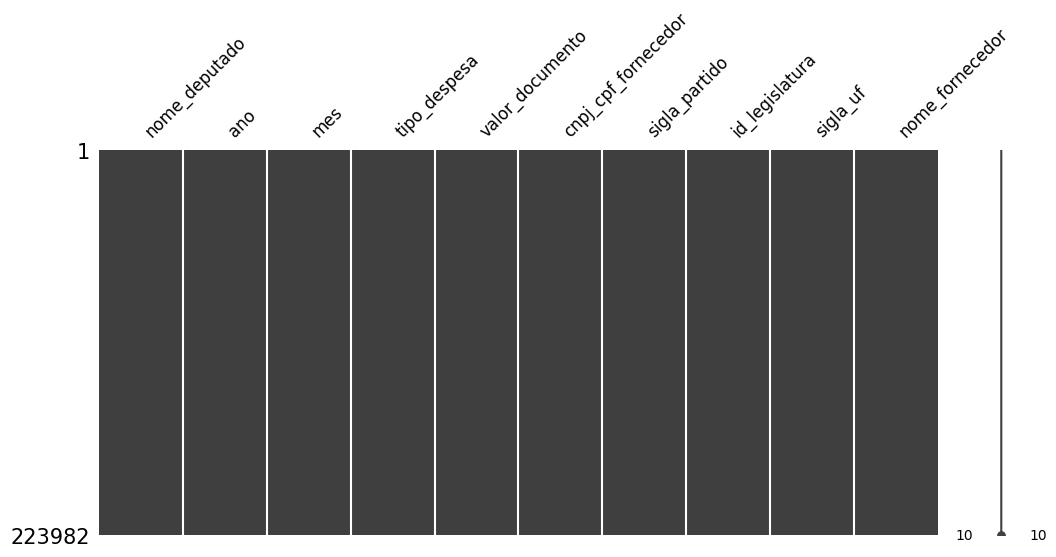

In [5]:
msno.matrix(df, figsize=(12, 5), fontsize=12)

In [6]:
df["valor_documento"].isna().any()

np.False_

In [7]:
le_df = df[
    [
        "nome_deputado",
        "ano",
        "mes",
        "tipo_despesa",
        "valor_documento",
        "sigla_partido",
        "sigla_uf",
        "nome_fornecedor",
    ]
]

In [8]:
for col in le_df.select_dtypes(include=["object"]).columns:
    label_encoder = LabelEncoder()
    le_df[col] = label_encoder.fit_transform(le_df[col].astype(str))
    print(f"Encoded {col} with classes: {label_encoder.classes_}")

/tmp/ipykernel_64980/42765082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_df[col] = label_encoder.fit_transform(le_df[col].astype(str))
/tmp/ipykernel_64980/42765082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_df[col] = label_encoder.fit_transform(le_df[col].astype(str))
/tmp/ipykernel_64980/42765082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Encoded nome_deputado with classes: ['AJ Albuquerque' 'Abou Anni' 'Abílio Santana' 'Acácio Favacho'
 'Adail Filho' 'Adilson Barroso' 'Adolfo Viana' 'Adriana Ventura'
 'Adriano do Baldy' 'Aelton Freitas' 'Afonso Florence' 'Afonso Hamm'
 'Afonso Motta' 'Aguinaldo Ribeiro' 'Airton Faleiro' 'Alan Rick'
 'Alberto Fraga' 'Albuquerque' 'Alceu Moreira' 'Alcides Rodrigues'
 'Alencar Santana' 'Alessandro Molon' 'Alex Manente' 'Alex Santana'
 'Alexandre Figueiredo' 'Alexandre Frota' 'Alexandre Guimarães'
 'Alexandre Leite' 'Alexandre Lindenmeyer' 'Alexandre Padilha'
 'Alexis Fonteyne' 'Alfredinho' 'Alfredo Gaspar' 'Alice Portugal'
 'Aliel Machado' 'Aline Gurgel' 'Aline Sleutjes' 'Allan Garcês'
 'Altineu Côrtes' 'Aluisio Mendes' 'Alê Silva' 'Amanda Gentil'
 'Amaro Neto' 'Amom Mandel' 'Ana Paula Leão' 'Ana Paula Lima'
 'Ana Pimentel' 'Andreia Siqueira' 'André Abdon' 'André Fernandes'
 'André Ferreira' 'André Figueiredo' 'André Fufuca' 'André Janones'
 'André de Paula' 'Angela Amin' 'Antonio Andrade

/tmp/ipykernel_64980/42765082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_df[col] = label_encoder.fit_transform(le_df[col].astype(str))


In [9]:
le_df.head(10)

,nome_deputado,ano,mes,tipo_despesa,valor_documento,sigla_partido,sigla_uf,nome_fornecedor
0,3,2023,1,4,25000.00,3,3,9828
1,3,2023,1,19,353.70,3,3,5123
2,3,2023,1,19,116.43,3,3,5123
3,3,2023,1,9,10000.00,3,3,7176
4,3,2023,3,10,809.60,3,3,7384
5,3,2023,2,2,221.98,3,3,26
6,3,2023,2,2,283.97,3,3,26
7,3,2023,3,2,299.98,3,3,26
8,3,2023,5,2,100.04,3,3,26
9,3,2023,7,2,150.00,3,3,26


In [10]:
n_estimators = 100
contamination = 0.01
sample_size = 256

model = IsolationForest(
    n_estimators=n_estimators, contamination=contamination, max_samples=sample_size, random_state=42
)
model.fit(le_df)

,n_estimators,100
,max_samples,256
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [11]:
preds = model.predict(le_df)
df["anomaly"] = preds

# -1 para anomalias, 1 para dados normais
anomalies = df[df["anomaly"] == -1]
print(f"Há {len(anomalies)} anomalias no dataframe contendo {len(df)} registros")
print(f"Isso representa {100 * (len(anomalies) / len(df))}% dos registros")

Há 2240 anomalias no dataframe contendo 223982 registros
Isso representa 1.0000803636006466% dos registros


In [13]:
display(Markdown(anomalies.sample(10).to_markdown()))

|        | nome_deputado         |   ano |   mes | tipo_despesa                                              |   valor_documento |   cnpj_cpf_fornecedor | sigla_partido   |   id_legislatura | sigla_uf   | nome_fornecedor                                                 |   anomaly |
|-------:|:----------------------|------:|------:|:----------------------------------------------------------|------------------:|----------------------:|:----------------|-----------------:|:-----------|:----------------------------------------------------------------|----------:|
|   9662 | Dra. Alessandra Haber |  2024 |    11 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |            720    |        08532429000131 | MDB             |               57 | PA         | AMORETTO CAFES EXPRESSO LTDA                                    |        -1 |
|    801 | Bacelar               |  2023 |     5 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           9124.9  |           89982185500 | PV              |               57 | BA         | AFRANIO CEZAR OLIVA DE MATTOS FILHO                             |        -1 |
|   7436 | Aécio Neves           |  2024 |     7 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           7723.9  |        04292201000160 | PSDB            |               57 | MG         | ANUAR DONATO CONSULT. IMOBILIARIA                               |        -1 |
|   8679 | Clarissa Tércio       |  2024 |     1 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           7500    |           61601152434 | PP              |               57 | PE         | ILA DE SOUZA CABRAL                                             |        -1 |
|  13952 | Ruy Carneiro          |  2024 |    10 | COMBUSTÍVEIS E LUBRIFICANTES.                             |           1129.15 |        01420327000185 | PODE            |               57 | PB         | MOTOGAS IND.DE COMPRESSAO E COM.DE GAS NATURAL LTD              |        -1 |
| 190457 | Alencar Santana       |  2022 |    12 | DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                      |          62000    |        03188474000105 | PT              |               57 | SP         | DIGRAF GRAFICA E EDITORA LTDA                                   |        -1 |
|   9378 | Diego Coronel         |  2024 |    11 | COMBUSTÍVEIS E LUBRIFICANTES.                             |            100    |        00306597007614 | PSD             |               57 | BA         | 076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA        |        -1 |
|  11568 | Leur Lomanto Júnior   |  2024 |     6 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           6000    |           01554283574 | UNIÃO           |               57 | BA         | LUCAS GEDEON SAMPAIO                                            |        -1 |
|  12774 | Nilto Tatto           |  2024 |    12 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           3620    |        22392165000199 | PT              |               57 | SP         | ATTBRASIL TECNOLOGIA LOCAÇÃO E SOLUÇÕES EM INFORMÁTICA LTDA-EPP |        -1 |
|   8221 | Benes Leocádio        |  2024 |     6 | MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR |           8846    |           10685090400 | UNIÃO           |               57 | RN         | Claudio Manoel de Amorim Santos                                 |        -1 |